In [2]:
import numpy as np
import matplotlib.pyplot as plt
from env import Environment
from qagent import Agents
import os

In [3]:
def train_on_map(map_file, num_agents, n_packages, episodes, max_time_steps, 
                 alpha, alpha_decay, alpha_min, gamma, epsilon, epsilon_min, epsilon_decay_ep, seed):
    # Khởi tạo môi trường
    env = Environment(
        map_file=map_file,
        max_time_steps=max_time_steps,
        n_robots=num_agents,
        n_packages=n_packages,
        move_cost=-0.01,
        delivery_reward=10.0,
        delay_reward=1.0,
        seed=seed
    )
    
    # Khởi tạo agents
    agents = Agents(
        alpha=alpha,
        alpha_decay=alpha_decay,
        alpha_min=alpha_min,
        gamma=gamma,
        epsilon=epsilon,
        epsilon_min=epsilon_min
    )
    
    # Khởi tạo agents với trạng thái ban đầu
    state = env.reset()
    agents.init_agents(state, move_cost=-0.01)
    
    # Lưu trữ tổng reward cho mỗi episode
    total_rewards = []
    
    # Huấn luyện qua các episode
    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        
        while not done:
            # Lấy hành động từ agents
            actions = agents.get_actions(state)
            
            # Thực hiện bước trong môi trường
            next_state, reward, done, infos = env.step(actions)
            
            # Cập nhật agents
            agents.update_agents(actions, reward, next_state)
            
            # Cộng dồn reward
            episode_reward += reward
            state = next_state
        
        # Giảm epsilon sau mỗi episode
        agents.decay_epsilon_all(decay_rate=epsilon_decay_ep)
        agents.decay_alpha_all(decay_rate=alpha_decay)
        
        # Lưu tổng reward
        total_rewards.append(episode_reward)
        
        # In tiến trình
        if (episode + 1) % 1000 == 0:
            print(f"Map {map_file}, Episode {episode + 1}/{episodes}, Total Reward: {episode_reward:.2f}")
    
    # Lưu Q-table
    save_folder = f"q_tables_{map_file.split('.')[0]}"
    agents.save_all(save_folder)
    print(f"Saved Q-tables to {save_folder}")
    
    return total_rewards

In [4]:
params = {
    'num_agents': 5,
    'n_packages': 10,
    'episodes': 50000,
    'max_time_steps': 1000,
    'alpha': 0.1,
    'alpha_decay': 0.995,
    'alpha_min': 0.001,
    'gamma': 0.95,
    'epsilon': 1.0,
    'epsilon_min': 0.01,
    'epsilon_decay_ep': 0.995,
    'seed': 10
}

# Danh sách các map
maps = ['map1.txt', 'map2.txt', 'map3.txt', 'map4.txt', 'map5.txt']


Training on map1.txt...
Map map1.txt, Episode 1000/50000, Total Reward: -0.91
Map map1.txt, Episode 2000/50000, Total Reward: -3.36
Map map1.txt, Episode 3000/50000, Total Reward: -1.64
Map map1.txt, Episode 4000/50000, Total Reward: -1.51
Map map1.txt, Episode 5000/50000, Total Reward: -3.01
Map map1.txt, Episode 6000/50000, Total Reward: -1.58
Map map1.txt, Episode 7000/50000, Total Reward: -1.61
Map map1.txt, Episode 8000/50000, Total Reward: -0.88
Map map1.txt, Episode 9000/50000, Total Reward: -0.63
Map map1.txt, Episode 10000/50000, Total Reward: -0.70
Map map1.txt, Episode 11000/50000, Total Reward: -0.56
Map map1.txt, Episode 12000/50000, Total Reward: -0.68
Map map1.txt, Episode 13000/50000, Total Reward: -0.84
Map map1.txt, Episode 14000/50000, Total Reward: -0.55
Map map1.txt, Episode 15000/50000, Total Reward: -2.34
Map map1.txt, Episode 16000/50000, Total Reward: -0.64
Map map1.txt, Episode 17000/50000, Total Reward: -0.99
Map map1.txt, Episode 18000/50000, Total Reward: 

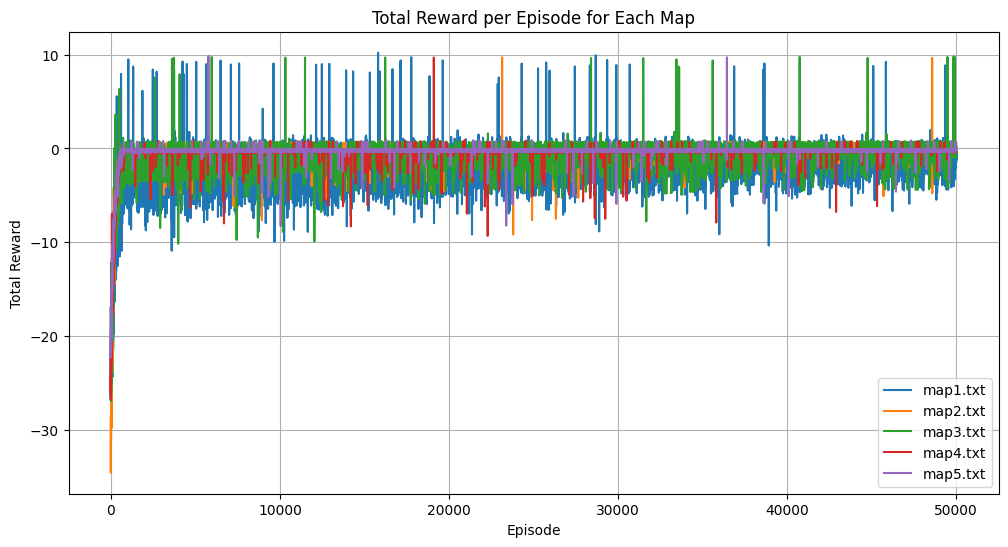

Saved training rewards plot to training_rewards.png


<Figure size 640x480 with 0 Axes>

In [5]:
all_rewards = {}

# Huấn luyện trên từng map
for map_file in maps:
    print(f"\nTraining on {map_file}...")
    rewards = train_on_map(
        map_file=map_file,
        num_agents=params['num_agents'],
        n_packages=params['n_packages'],
        episodes=params['episodes'],
        max_time_steps=params['max_time_steps'],
        alpha=params['alpha'],
        alpha_decay=params['alpha_decay'],
        alpha_min=params['alpha_min'],
        gamma=params['gamma'],
        epsilon=params['epsilon'],
        epsilon_min=params['epsilon_min'],
        epsilon_decay_ep=params['epsilon_decay_ep'],
        seed=params['seed']
    )
    all_rewards[map_file] = rewards

# Vẽ biểu đồ tổng reward
plt.figure(figsize=(12, 6))
for map_file, rewards in all_rewards.items():
    plt.plot(rewards, label=f'{map_file}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Each Map')
plt.legend()
plt.grid(True)
plt.show()

# Lưu biểu đồ
plt.savefig('training_rewards.png')
print("Saved training rewards plot to training_rewards.png")

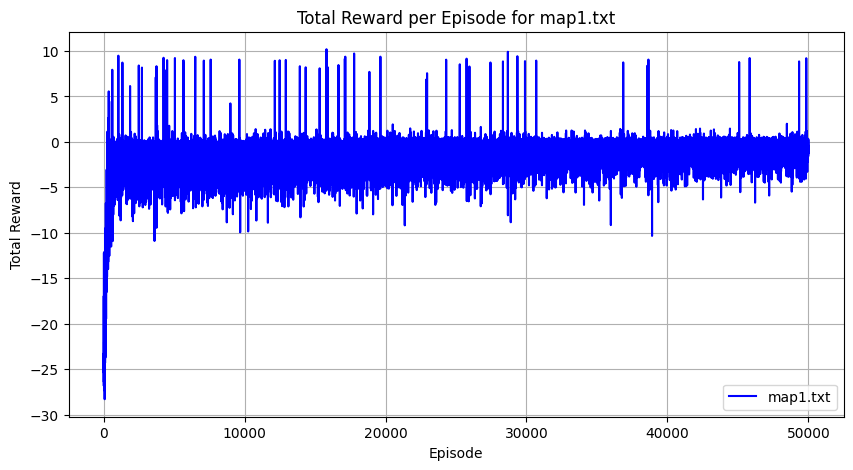

Saved plot for map1.txt to rewards_map1.png


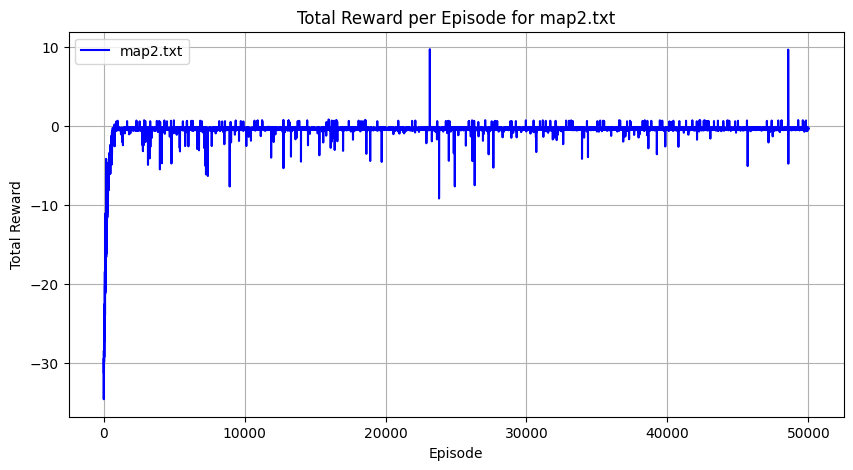

Saved plot for map2.txt to rewards_map2.png


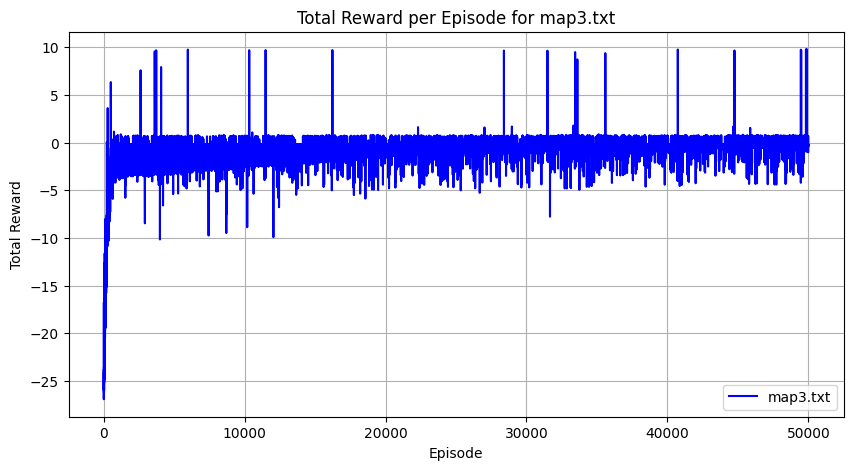

Saved plot for map3.txt to rewards_map3.png


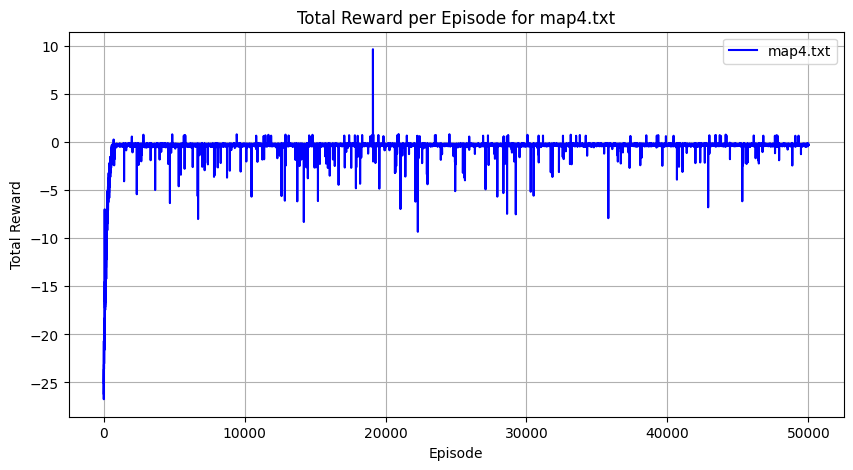

Saved plot for map4.txt to rewards_map4.png


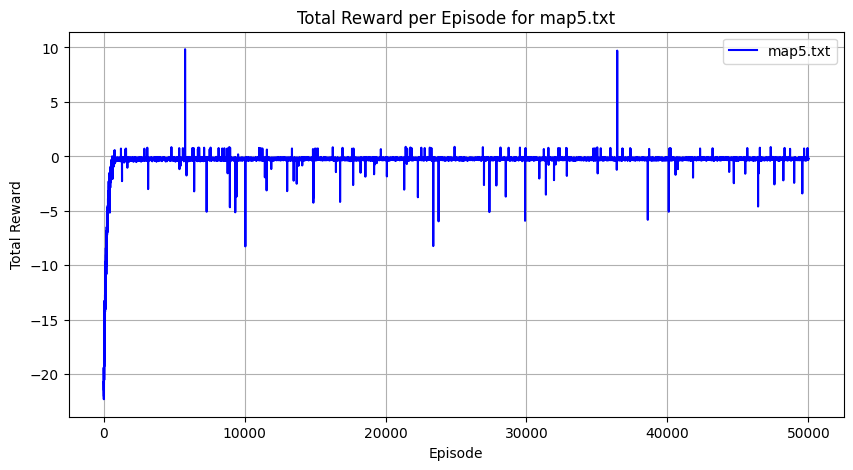

Saved plot for map5.txt to rewards_map5.png


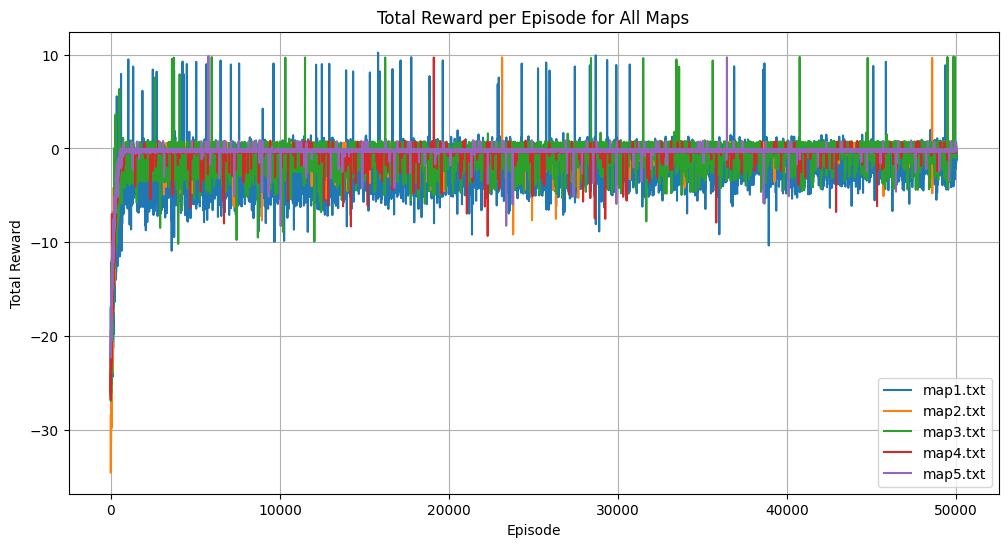

Saved combined rewards plot to training_rewards_all.png


In [6]:
# Vẽ biểu đồ riêng cho từng map
for map_file, rewards in all_rewards.items():
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label=f'{map_file}', color='blue')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(f'Total Reward per Episode for {map_file}')
    plt.legend()
    plt.grid(True)
    plt.show()  # Hiển thị biểu đồ trong notebook
    # Lưu biểu đồ
    output_file = f"rewards_{map_file.split('.')[0]}.png"
    plt.savefig(output_file)
    print(f"Saved plot for {map_file} to {output_file}")
    plt.close()  # Đóng figure để tránh chồng lấn

# Vẽ biểu đồ tổng hợp cho tất cả map (tùy chọn)
plt.figure(figsize=(12, 6))
for map_file, rewards in all_rewards.items():
    plt.plot(rewards, label=f'{map_file}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for All Maps')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('training_rewards_all.png')
print("Saved combined rewards plot to training_rewards_all.png")
plt.close()